# Parameter Norm Penalties (L1, L2, Elastic Net)

This notebook demonstrates various parameter norm penalty techniques for regularization in linear regression models:

- **L1 Regularization (Lasso)**: Encourages sparsity by driving some coefficients to zero
- **L2 Regularization (Ridge)**: Shrinks coefficients to prevent overfitting
- **Elastic Net**: Combines both L1 and L2 penalties

These techniques help prevent overfitting and improve model generalization on unseen data.

**NOTE**:
1. Pay close attention to the function doc-strings, they give you clues on what to include in your implementation.

2. Set the `random_seed = 42` for any part of your code that requires randomness.

3. You are free to use the `scikit-learn` library for implementing the regression models.

In this exercise, you will be working on the provided `regularization_dataset.csv` dataset. In this dataset, columns `x0` through `x47` correspond to the input and column `y` corresponds to the output.You will be working with linear regression and using different norm penalties to analyze their regularizing behaviour.

The basic inputs are provided to you. You are free to import additional components, **but add comments to explain why you added them**.

In [4]:
# Google Colab drive mount (not needed for local execution)
# Uncomment if running on Google Colab:
# from google.colab import drive
# drive.mount('/content/drive/')

Mounted at /content/drive/


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

## a. Data setup [0.5 points]
First things first, let's load the dataset. Complete the function `load_data()` to load data from the supplied csv file.



In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

def load_data(file_path):
    """
    Loads a dataset from the specified CSV file, separates the features and target,
    normalizes the features, and splits the data into training and testing sets.

    Parameters:
    - file_path (str): The path to the CSV file containing the dataset.

    Returns:
    - X_train (ndarray): The training set features after normalization.
    - X_test (ndarray): The testing set features after normalization.
    - y_train (ndarray): The training set target values.
    - y_test (ndarray): The testing set target values.
    """
    # Load the dataset from the CSV file
    data = pd.read_csv(file_path)

    # Separate features (x0 through x47) and target (y)
    X = data.iloc[:, :-1].values  # Select all columns except the last
    y = data.iloc[:, -1].values   # Select the last column

    # Normalize the features using StandardScaler to zero mean and unit variance
    scaler = StandardScaler()
    X_normalized = scaler.fit_transform(X)

    # Split the data into training (80%) and testing (20%) sets
    X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

    return X_train, X_test, y_train, y_test


In [5]:
X_train, X_test, y_train, y_test = load_data('data/regularization_dataset.csv') # Path relative to project root

### b. Regression Model setup [0.5 points]

In this part, you will build and evaluate a Linear Regression model trained on the data without any regularization. Complete the function `train_lr()` to train the model, evaluate its performance using Mean Squared Error (MSE), and extract the model's coefficients.

**Tasks to implement**:
- Initialize the Linear Regression model.
- Train the model method on `X_train` and `y_train`.
- Make predictions on the test dataset `X_test`.
- Calculate the Mean Squared Error (MSE) between the predicted and actual values `y_test`.
- Extract the coefficients of the trained model.

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

def train_lr(X_train, X_test, y_train, y_test):
    """
    This is a wrapper function for training a linear regression model.

    Parameters:
    - X_train: Features for training
    - X_test: Features for testing
    - y_train: Target values for training
    - y_test: Target values for testing

    Returns:
    - model: Trained model
    - mse: The mean-squared error at test time
    - coeffs: List of coefficients from the trained model
    """
    # Initialize the Linear Regression model
    model = LinearRegression()

    # Train the model on the training data
    model.fit(X_train, y_train)

    # Make predictions on the test dataset
    y_pred = model.predict(X_test)

    # Calculate the Mean Squared Error (MSE) between the predictions and actual test values
    mse = mean_squared_error(y_test, y_pred)

    # Extract the coefficients of the trained model
    coeffs = model.coef_.tolist()

    return model, mse, coeffs


## c. Regularized Regression Models [0.5 points]

In this part, you will build and evaluate regularized linear regression models using Ridge, Lasso, and ElasticNet. These models add a penalty term to the loss function to regularize the coefficients, helping to prevent overfitting. You will complete the function `train_lr_reg()` to train models with different regularization types and evaluate their performance

**Tasks to Implement**:

- Based on the reg parameter, initialize the appropriate regression model:
  - Use standard linear regression when `reg` is None.
  - Use ridge when `reg` is `ridge`.
  - Use Lasso when `reg` is `lasso`.
  - Use ElasticNet when `reg` is `elasticnet`.
  - Raise a ValueError for invalid values of `reg`.
- Train the selected model on `X_train` and `y_train`.
- Make predictions on the test dataset `X_test`.
- Calculate the Mean Squared Error (MSE) between the predicted and actual values (`y_test`).
- Extract the coefficients of the trained model.

In [7]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

def train_lr_reg(X_train, X_test, y_train, y_test, reg=None, alpha=1.0):
    """
    This is a wrapper function for training a linear regression model with optional regularization.

    Parameters:
    - X_train: Features for training
    - X_test: Features for testing
    - y_train: Target values for training
    - y_test: Target values for testing
    - reg: Regularization type ('ridge', 'lasso', 'elasticnet', or None for standard Linear Regression)
    - alpha: Regularization strength (applicable for Ridge, Lasso, and ElasticNet)

    Returns:
    - model: Trained model
    - mse: the mean-squared error at test time
    - coeffs: List of coefficients from the trained model
    """
    # Initialize the appropriate regression model
    if reg is None:
        model = LinearRegression()
    elif reg == 'ridge':
        model = Ridge(alpha=alpha)
    elif reg == 'lasso':
        model = Lasso(alpha=alpha)
    elif reg == 'elasticnet':
        model = ElasticNet(alpha=alpha)
    else:
        raise ValueError("Invalid value for reg. Choose from None, 'ridge', 'lasso', or 'elasticnet'.")

    # Train the model on the training data
    model.fit(X_train, y_train)

    # Make predictions on the test dataset
    y_pred = model.predict(X_test)

    # Calculate the Mean Squared Error (MSE) between predictions and actual test values
    mse = mean_squared_error(y_test, y_pred)

    # Extract the coefficients of the trained model
    coeffs = model.coef_.tolist()

    return model, mse, coeffs


## d. Hyperparameter Search [0.5 points]

Here, you will perform a grid search over a given range of values for the regularization parameter alpha to find the most optimal value for each type of regularization (Ridge, Lasso, and ElasticNet). The goal is to minimize the Mean Squared Error (MSE) for the model.

For each regularization type (ridge, lasso, and elasticnet), evaluate the model performance over different values of alpha. For each model, you should report:

  - The best value of alpha that minimizes the MSE.
  - The corresponding MSE at the best alpha.

You will then compare the MSE for each regularized model with the MSE obtained from the non-regularized linear regression model (i.e., without any regularization). This will help you assess the impact of regularization on the model performance.

In [8]:
def alpha_search(X_train, X_test, y_train, y_test, alphas, reg_type):
    """
    Evaluates a specified regularization model (Ridge, Lasso, or ElasticNet) over a range of alpha values.
    The function returns the best alpha and MSE for the chosen regularization type.

    Parameters:
    - X_train: Feature matrix for training.
    - X_test: Feature matrix for testing.
    - y_train: Target values for training.
    - y_test: Target values for testing.
    - alphas: List of regularization strengths to evaluate.
    - reg_type: The type of regularization ('ridge', 'lasso', or 'elasticnet').

    Returns:
    - result: A dictionary containing the best alpha and MSE for the selected regularization type.
    """
    best_alpha = None
    best_mse = float('inf')  # Initialize with a large value
    best_model = None

    # Iterate over all alpha values
    for alpha in alphas:
        # Train the model with the current alpha
        model, mse, _ = train_lr_reg(X_train, X_test, y_train, y_test, reg=reg_type, alpha=alpha)

        # Check if this is the best MSE so far
        if mse < best_mse:
            best_mse = mse
            best_alpha = alpha
            best_model = model

    result = {
        "best_alpha": best_alpha,
        "best_mse": best_mse,
        "best_model": best_model
    }
    return result


In [10]:
## DONT'T CHANGE THIS CODE BLOCK
alphas = [0.0001, 0.001, 0.01, 0.1, 1.0]

linear_model, linear_mse, linear_coeffs = train_lr(X_train, X_test, y_train, y_test)
best_ridge = alpha_search(X_train, X_test, y_train, y_test, alphas, reg_type='ridge')
best_lasso = alpha_search(X_train, X_test, y_train, y_test, alphas, reg_type='lasso')
best_elasticnet = alpha_search(X_train, X_test, y_train, y_test, alphas, reg_type='elasticnet')

# Print the results in the desired format
print("Linear Regression (No regularization):")
print(f"  MSE: {linear_mse}\n")

print("Ridge Regression:")
print(f"  Best Alpha: {best_ridge['best_alpha']}")
print(f"  MSE: {best_ridge['best_mse']}\n")

print("Lasso Regression:")
print(f"  Best Alpha: {best_lasso['best_alpha']}")
print(f"  MSE: {best_lasso['best_mse']}\n")

print("ElasticNet Regression:")
print(f"  Best Alpha: {best_elasticnet['best_alpha']}")
print(f"  MSE: {best_elasticnet['best_mse']}\n")

Linear Regression (No regularization):
  MSE: 8.807143776342143

Ridge Regression:
  Best Alpha: 1.0
  MSE: 3.698401281245303

Lasso Regression:
  Best Alpha: 0.01
  MSE: 3.278097198898938

ElasticNet Regression:
  Best Alpha: 0.01
  MSE: 3.41999818892767



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.432e+02, tolerance: 9.953e-02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.282e+01, tolerance: 9.953e-02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.543e+02, tolerance: 9.953e

## e. Visualize regularization [0.5 points]

Here, you will visualize how the regularization strength parameter $α$ influences both the magnitudes of the model coefficients and the model's mean squared error (MSE). The plot generated should display the following:
- **Coefficient Magnitudes**: The effect of increasing αα on the magnitude of the coefficients for each feature.
- **Mean Squared Error (MSE)**: The impact of different $α$ values on the model's performance, measured by MSE, same as `alpha_search()`.


**Tasks to Implement**:

- Train the specified regularized regression model (Ridge, Lasso, or ElasticNet) using the training data `(X_train, y_train)` for different $\alpha$ values.
- Create a plot with two y-axes:
  - Left y-axis: Display the magnitude of the coefficients for each feature across different values of $\alpha$.
  - Right y-axis: Show the MSE for each value of $\alpha$, indicating how the regularization strength affects model performance.

- For each feature, plot its coefficient magnitude as a function of $\alpha$ (**log scale**) on the left y-axis.

- Plot the MSE for each $\alpha$ on the right y-axis.

In [11]:
import matplotlib.pyplot as plt
import numpy as np

def plot_regularization_effect(X_train, X_test, y_train, y_test, alphas, reg_type='lasso'):
    """
    This function trains a regularized regression model over a range of alpha values,
    then plots the coefficient magnitudes and MSE for each value of alpha on a dual-axis plot.

    Parameters:
    - X_train: Feature matrix for training.
    - X_test: Feature matrix for testing.
    - y_train: Target values for training.
    - y_test: Target values for testing.
    - alphas: List of regularization strengths (alphas) to evaluate.
    - reg_type: Type of regularization ('ridge', 'lasso', or 'elasticnet').

    Returns:
    - None: This function generates and shows a plot.
    """
    coeffs = []
    mses = []

    for alpha in alphas:
        # Train the model for the current alpha
        model, mse, model_coeffs = train_lr_reg(X_train, X_test, y_train, y_test, reg=reg_type, alpha=alpha)
        mses.append(mse)
        coeffs.append(model_coeffs)

    coeffs = np.array(coeffs)

    # Create the plot
    fig, ax1 = plt.subplots()

    # Plot coefficient magnitudes
    ax1.set_xscale('log')
    for i in range(coeffs.shape[1]):
        ax1.plot(alphas, np.abs(coeffs[:, i]), label=f'Feature {i+1}', alpha=0.6)
    ax1.set_xlabel("Alpha (log scale)")
    ax1.set_ylabel("Coefficient Magnitudes")
    ax1.set_title(f"Regularization Effect: {reg_type.capitalize()}")
    ax1.grid(True)

    # Create second y-axis for MSE
    ax2 = ax1.twinx()
    ax2.plot(alphas, mses, color='red', label="MSE", marker='o')
    ax2.set_ylabel("Mean Squared Error (MSE)", color='red')
    ax2.tick_params(axis='y', labelcolor='red')

    # Combine legends
    lines_1, labels_1 = ax1.get_legend_handles_labels()
    lines_2, labels_2 = ax2.get_legend_handles_labels()
    ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

    plt.show()


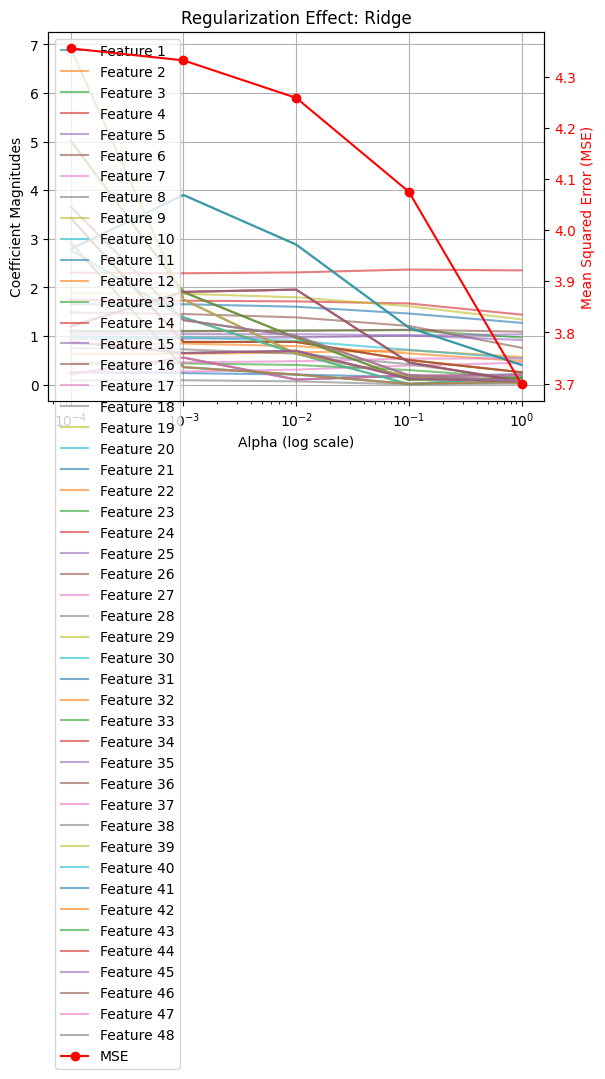

In [12]:
plot_regularization_effect(X_train, X_test, y_train, y_test, alphas, reg_type='ridge')

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.432e+02, tolerance: 9.953e-02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.282e+01, tolerance: 9.953e-02
  model = cd_fast.enet_coordinate_descent(


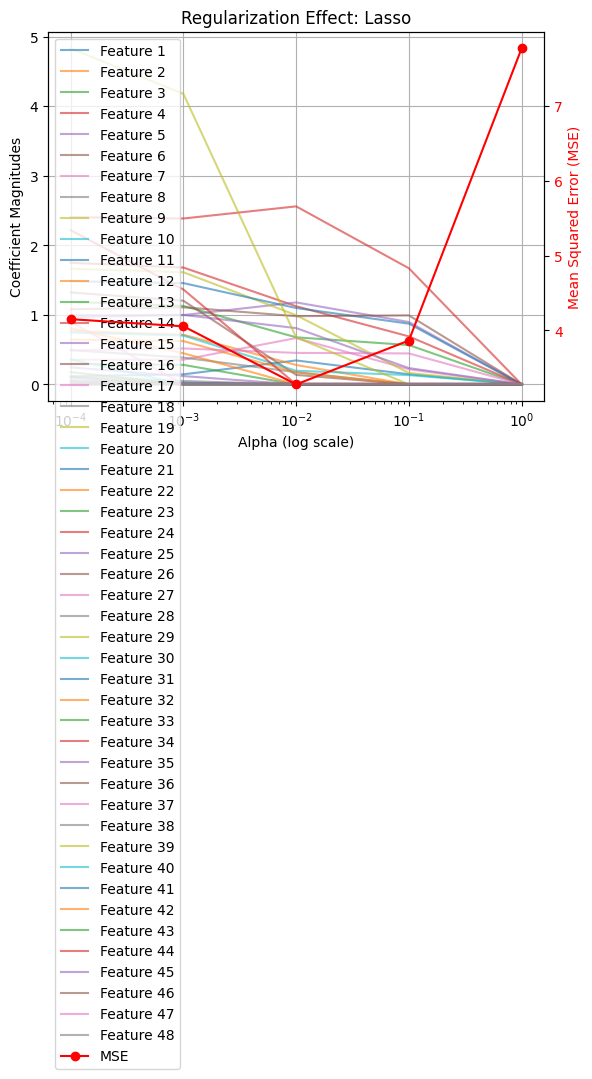

In [13]:
plot_regularization_effect(X_train, X_test, y_train, y_test, alphas, reg_type='lasso')

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.543e+02, tolerance: 9.953e-02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.373e+01, tolerance: 9.953e-02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.371e+00, tolerance: 9.953e

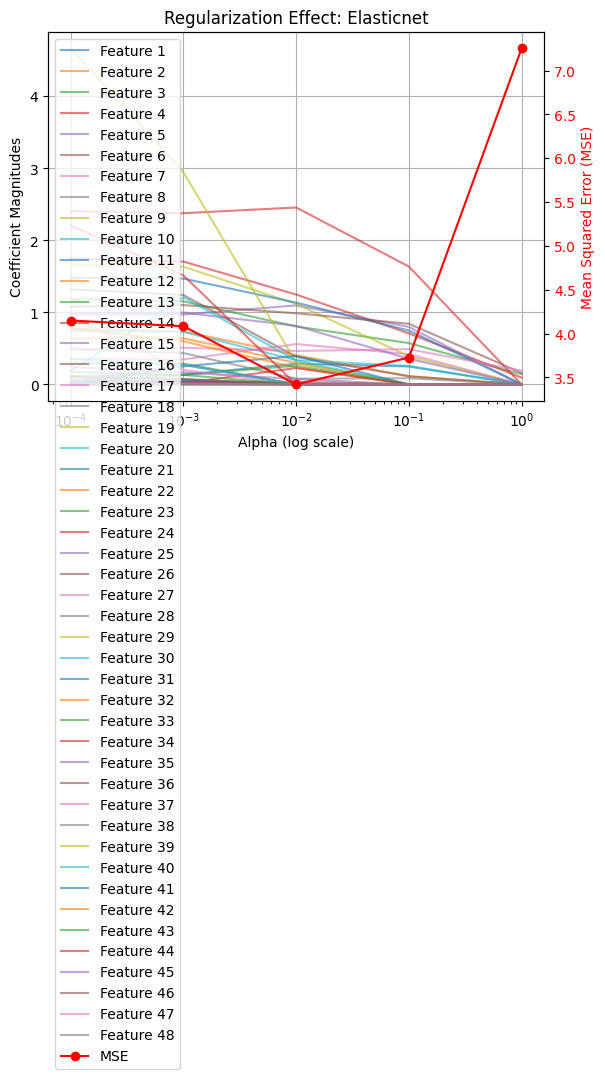

In [14]:
plot_regularization_effect(X_train, X_test, y_train, y_test, alphas, reg_type='elasticnet')

### Answer the following questions based on your plots: [0.25 + 0.25 points]

Q1: What differences do you observe in the coefficients between lasso ($L_{1}$) and ridge ($L_{2}$) regularization?<br>
Q2: ElasticNet is a combination of both $L_{1}$ and $L_{2}$ regularization, what is its effect on the model coefficients?

Q1: What differences do you observe in the coefficients between Lasso (L1) and Ridge (L2) regularization?
Lasso (L1 Regularization):

Drives many coefficients exactly to zero as the regularization strength (alpha) increases. This leads to feature selection, as only the most important features retain non-zero coefficients.
Coefficients exhibit sharp changes (discontinuous behavior) as alpha increases.
Lasso is more aggressive in reducing the magnitude of coefficients compared to Ridge.
Ridge (L2 Regularization):

Shrinks coefficients toward zero but does not set them exactly to zero, meaning all features contribute to the model (no feature selection).
Coefficients change more smoothly (continuous behavior) as alpha increases.
Ridge focuses on reducing the magnitude of all coefficients simultaneously rather than eliminating some features entirely.


Q2: ElasticNet is a combination of both L1 and L2 regularization. What is its effect on the model coefficients?
ElasticNet combines the benefits of both L1 and L2 regularization:
Like Lasso, it can drive some coefficients to exactly zero, providing feature selection.
Like Ridge, it ensures stability by penalizing large coefficients more evenly and avoids the aggressive feature elimination of Lasso.
ElasticNet tends to retain a larger number of features compared to Lasso, especially when features are correlated, as it balances between selection and coefficient shrinkage.
Coefficient magnitudes exhibit behavior intermediate between Ridge (smooth shrinkage) and Lasso (sharp shrinkage).